<a href="https://colab.research.google.com/github/alruizzo/missing_persons/blob/main/Desaparecidos_unseen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Aplicación Especialización en Estadística Aplicada**
---



## **Factores de predicción de la aparición de personas mayores reportadas como desaparecidas**
---

![](https://www.infobae.com/new-resizer/b8r9oLLmBqIgVSsie5UGwM1nvm4=/1200x900/filters:format(jpg):quality(85)//arc-anglerfish-arc2-prod-infobae.s3.amazonaws.com/public/UFQOZRZCURB4BOIRTLM3IT2HCM.jpg)

**Por: Adriana Lucía Ruiz Rizzo**

### **1 Importar los paquetes requeridos**
---

In [ ]:
# Manejo de datos
import pandas as pd             
import numpy as np

# Manejo de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento
from collections import Counter
from datetime import datetime

# Manejo de modelos
from scipy import stats
import pickle

### **2 Cargar datos (unseen)**
---


In [ ]:
datos = pd.read_csv("https://drive.google.com/uc?id=1SI8CV0NT54-RrYTsknPo9RAfe4IZ4hK7")
datos

,ID,Estado de la desaparición,Clasificación de la desaparición,Fecha de la desaparición,Edad al momento de la desaparición,Sexo del desaparecido,País de nacimiento del desaparecido,Ancestro racial del desaparecido,Estado civil del desaparecido,Escolaridad del desaparecido,Factor de vulnerabilidad del desaparecido,País donde ocurre la desaparición,Municipio donde ocurre la desaparición DANE,Departamento donde ocurre la desaparición DANE,Contexto
0,1,Desaparecido,Sin Información,2006-12-29T00:00:00.000,21.0,Hombre,Sin información,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Persona adicta a una droga natural o sintética,Sin información,Sin Información,Sin información,Desaparición
1,2,Desaparecido,Sin Información,2006-12-26T00:00:00.000,24.0,Hombre,Colombia,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Persona adicta a una droga natural o sintética,Colombia,Bogotá D.C.,Bogotá D.C,Desaparición
2,3,Desaparecido,Sin Información,2006-12-29T00:00:00.000,13.0,Mujer,Colombia,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C,Desaparición
3,4,Aparecio Muerto,Sin Información,2006-12-31T00:00:00.000,50.0,Hombre,Colombia,Blanco,Soltero (a),Educación básica primaria,Persona adicta a una droga natural o sintética,Sin información,Sin Información,Sin información,Desaparición
4,5,Aparecio Vivo,Sin Información,2006-12-29T00:00:00.000,17.0,Mujer,Sin información,Mestizo,Soltero (a),Educación técnica profesional y tecnológica,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C,Desaparición
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164762,164763,Desaparecido,Desaparición Presuntamente Forzada,2004-06-01T00:00:00.000,20.0,Hombre,Colombia,Sin Información,Soltero (a),Educación inicial y educación preescolar,Ninguno,Colombia,Medellín,Antioquia,Desaparición
164763,164764,Desaparecido,Sin Información,2021-09-18T00:00:00.000,14.0,Mujer,Colombia,Mestizo,Soltero (a),Educación básica primaria,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C,Desaparición
164764,164765,Desaparecido,Desaparición Presuntamente Forzada,1985-04-16T00:00:00.000,17.0,Hombre,Colombia,Blanco,Soltero (a),Educación inicial y educación preescolar,Sin información,Colombia,Riohacha,La Guajira,Desaparición
164765,164766,Desaparecido,Sin Información,2021-09-22T00:00:00.000,35.0,Hombre,Colombia,Mestizo,Unión libre,Educación básica primaria,Ninguno,Colombia,Dos Quebradas,Risaralda,Desaparición


### **3 Revisar los datos**
---

In [ ]:
# Tipo de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164767 entries, 0 to 164766
Data columns (total 15 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   ID                                              164767 non-null  int64  
 1   Estado de la desaparición                       164767 non-null  object 
 2   Clasificación de la desaparición                164767 non-null  object 
 3   Fecha de la desaparición                        164767 non-null  object 
 4   Edad al momento de la desaparición              164767 non-null  float64
 5   Sexo del desaparecido                           164767 non-null  object 
 6   País de nacimiento del desaparecido             164767 non-null  object 
 7   Ancestro racial del desaparecido                164767 non-null  object 
 8   Estado civil del desaparecido                   164767 non-null  object 
 9   Escolaridad del desapareci

In [ ]:
# Listar variables para ajustar sus nombres
datos.columns

Index(['ID', 'Estado de la desaparición', 'Clasificación de la desaparición',
       'Fecha de la desaparición', 'Edad al momento de la desaparición',
       'Sexo del desaparecido', 'País de nacimiento del desaparecido',
       'Ancestro racial del desaparecido', 'Estado civil del desaparecido',
       'Escolaridad del desaparecido',
       'Factor de vulnerabilidad del desaparecido',
       'País donde ocurre la desaparición',
       'Municipio donde ocurre la desaparición DANE',
       'Departamento donde ocurre la desaparición DANE', 'Contexto'],
      dtype='object')

In [ ]:
# Simplificar (y cambiar) los nombres de las variables
datos.columns = ['ID', 'status', 'clasificacion',
       'fecha', 'edad', 'sexo', 'pais_nac', 'ancestro', 'estado_civil',
       'escolaridad', 'vulnerabilidad', 'pais_desap',
       'munic_desap_DANE', 'dept_desap_DANE', 'contexto']
datos.columns

Index(['ID', 'status', 'clasificacion', 'fecha', 'edad', 'sexo', 'pais_nac',
       'ancestro', 'estado_civil', 'escolaridad', 'vulnerabilidad',
       'pais_desap', 'munic_desap_DANE', 'dept_desap_DANE', 'contexto'],
      dtype='object')

### **4 Eliminar registros sin información de las variables más relevantes**
---

#### **a. Edad**

In [ ]:
# Revisar valores únicos de edad para hacerse a una idea de los ajustes necesarios
datos.edad.unique()

array([2.100e+01, 2.400e+01, 1.300e+01, 5.000e+01, 1.700e+01, 4.100e+01,
       7.100e+01, 2.500e+01, 2.000e+01, 1.500e+01, 5.400e+01, 4.000e+01,
       2.900e+01, 2.800e+01, 1.400e+01, 5.500e+01, 1.900e+01, 2.700e+01,
       3.900e+01, 4.700e+01, 4.500e+01, 3.600e+01, 8.700e+01, 4.400e+01,
       4.300e+01, 5.600e+01, 1.100e+01, 3.100e+01, 2.200e+01, 6.300e+01,
       4.800e+01, 1.800e+01, 1.600e+01, 3.800e+01, 5.800e+01, 3.500e+01,
       7.000e+01, 2.300e+01, 3.300e+01, 3.000e+01, 6.200e+01, 4.200e+01,
       0.000e+00, 5.200e+01, 1.200e+01, 7.200e+01, 7.400e+01, 7.000e+00,
       2.600e+01, 9.000e+00, 3.200e+01, 4.600e+01, 3.400e+01, 5.100e+01,
       8.000e+00, 5.300e+01, 7.900e+01, 7.600e+01, 4.900e+01, 5.000e+00,
       5.700e+01, 1.000e+01, 6.500e+01, 7.800e+01, 6.900e+01, 8.400e+01,
       8.300e+01, 6.000e+00, 6.400e+01, 7.300e+01, 8.200e+01, 5.900e+01,
       6.800e+01, 6.700e+01, 3.700e+01, 7.500e+01, 7.700e+01, 6.000e+01,
       8.000e+01, 8.800e+01, 1.083e+00, 8.600e+01, 

In [ ]:
# Seleccionar registros con valores de edad (determinar cuántos son faltantes)
InfoEdad = datos["edad"] != 'Sin información'
len(datos[InfoEdad])                          # n = 202 no tienen info de edad

164767

#### **b. Fecha de desaparición**

In [ ]:
# Revisar valores únicos de fecha para hacerse una idea de cómo deberían ajustarse
datos.fecha.unique()

array(['2006-12-29T00:00:00.000', '2006-12-26T00:00:00.000',
       '2006-12-31T00:00:00.000', ..., '1984-02-19T00:00:00.000',
       '2021-09-28T00:00:00.000', '2021-09-29T00:00:00.000'], dtype=object)

In [ ]:
# Seleccionar registros con valores de fecha (determinar cuántos son faltantes)
InfoFecha = datos["fecha"] != 'Sin información'
len(datos[InfoFecha])                         # n = 129 no tienen info de año

164767

#### **c. Clasificación de la desaparición**

In [ ]:
# Seleccionar registros que no corresponden a desaparición presuntamente forzada
InfoClasif = datos.clasificacion != 'Desaparición Presuntamente Forzada' 
len(datos[InfoClasif])                       # n = 32403 tienen clasificación
                                             # presuntamente forzada

131981

In [ ]:
# Revisar valores únicos de clasificación de la desaparición
datos.clasificacion.unique()

array(['Sin Información', 'Desaparición Presuntamente Forzada'],
      dtype=object)

#### **Filtro**

- Se eliminan los datos sin información en las variables más importantes (edad y fecha de desaparición) y aquellos con presunta clasificación de desaparición como forzada.

In [ ]:
# Hasta aquí podemos filtrar aquellos registros seleccionados anteriormente
datos = datos[InfoEdad & InfoFecha & InfoClasif]
len(datos)                                      # n = 129776

131981

- Se eliminan las variables redundantes o que no se necesitan en el modelo

In [ ]:
# Eliminar variables que no se necesitan o son redundantes con otras variables
datos = datos.drop(['contexto',         # redundante con clasificacion
            'clasificacion',    # sólo tiene una clase
            'pais_nac',         # no se considera relevante
            'ancestro'],        # no se considera relevante
           1)

In [ ]:
# Primero, se ajusta el tipo de las variable
datos['edad'] = datos.edad.astype('float').astype('int')
filtro_edad = datos['edad'] >= 60
filtro_status = datos["status"] != 'Aparecio Muerto'
datos = datos[filtro_edad & filtro_status]
len(datos)

7841

In [ ]:
# Dejamos sólo las desapariciones ocurridas en Colombia, ya que es menos
# probable que conozcamos con certeza el desenlace de la desaparición
# cuando ésta ocurrió en otro país y eliminamos después esa columna
desap_col = datos["pais_desap"] == 'Colombia'
datos = datos[desap_col]
datos = datos.drop("pais_desap", 1)
len(datos)
datos

,ID,status,fecha,edad,sexo,estado_civil,escolaridad,vulnerabilidad,munic_desap_DANE,dept_desap_DANE
33,34,Desaparecido,2006-12-12T00:00:00.000,87,Hombre,Soltero (a),Educación básica primaria,Otro,Bogotá D.C.,Bogotá D.C
45,46,Desaparecido,2006-12-25T00:00:00.000,63,Mujer,Soltero (a),Educación básica primaria,Ninguno,Bogotá D.C.,Bogotá D.C
67,68,Desaparecido,2006-12-02T00:00:00.000,70,Hombre,Casado (a),Educación básica primaria,Ninguno,Bogotá D.C.,Bogotá D.C
86,87,Aparecio Vivo,2007-01-04T00:00:00.000,62,Hombre,Soltero (a),Educación básica primaria,Ninguno,Soledad,Atlántico
107,108,Desaparecido,2007-01-01T00:00:00.000,74,Hombre,Soltero (a),Educación básica primaria,Ninguno,Santiago de Cali,Valle Del Cauca
...,...,...,...,...,...,...,...,...,...,...
164623,164624,Desaparecido,2021-09-21T00:00:00.000,67,Mujer,Casado (a),Educación media o secundaria alta,Ninguno,Venecia,Antioquia
164658,164659,Desaparecido,1989-01-01T00:00:00.000,61,Hombre,Casado (a),Educación básica primaria,Ninguno,Buenaventura,Valle Del Cauca
164702,164703,Desaparecido,2021-09-26T00:00:00.000,64,Mujer,"Separado (a), Divorciado (a)",Sin escolaridad,Ninguno,Bogotá D.C.,Bogotá D.C
164729,164730,Aparecio Vivo,2021-09-26T00:00:00.000,63,Mujer,Sin información,Sin información,Ninguno,Soacha,Cundinamarca


### **5 Transformación de variables**
--- 

In [ ]:
# Primero, se verifican los tipos de variable para determinar cuáles hay que
# transformar y a qué tipo
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7793 entries, 33 to 164747
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                7793 non-null   int64 
 1   status            7793 non-null   object
 2   fecha             7793 non-null   object
 3   edad              7793 non-null   int64 
 4   sexo              7793 non-null   object
 5   estado_civil      7793 non-null   object
 6   escolaridad       7793 non-null   object
 7   vulnerabilidad    7793 non-null   object
 8   munic_desap_DANE  7793 non-null   object
 9   dept_desap_DANE   7793 non-null   object
dtypes: int64(2), object(8)
memory usage: 669.7+ KB


#### **a. ID**

In [ ]:
datos['ID'] = datos.ID.astype('category')
datos.ID.unique()

[34, 46, 68, 87, 108, ..., 164624, 164659, 164703, 164730, 164748]
Length: 7793
Categories (7793, int64): [34, 46, 68, 87, ..., 164659, 164703, 164730, 164748]

#### **b. Status**
Variable de salida.

In [ ]:
datos['status'] = pd.Categorical(datos.status, categories = ["Aparecio Vivo",
                                                             "Desaparecido"],
                                 ordered = False)
#datos['status'] = datos.status.astype('category')
datos.status.value_counts()            # 5166 con status desaparecido y
                                       # 2689 con status de aparecido vivo
datos.status.cat.categories

Index(['Aparecio Vivo', 'Desaparecido'], dtype='object')

#### **c. Fecha**



In [ ]:
datos['fecha'] = pd.to_datetime(datos.fecha, format = '%Y-%m-%d')
datos.fecha

33       2006-12-12
45       2006-12-25
67       2006-12-02
86       2007-01-04
107      2007-01-01
            ...    
164623   2021-09-21
164658   1989-01-01
164702   2021-09-26
164729   2021-09-26
164747   2021-09-28
Name: fecha, Length: 7793, dtype: datetime64[ns]

In [ ]:
# Número de días desde el reporte de la desaparición: utilizaremos esta variable,
# ya que muchas observaciones tendrán menos de un año desde la desaparición
datos['dias'] = datetime.strptime('2021-11-30', '%Y-%m-%d') - datos.fecha
datos['dias'] = datos.dias.astype('string').str.replace(' days', '').astype('int')

In [ ]:
# Sacamos dos variables de la variable de fecha: año y mes, para poder analizar
# su contribución al modelo predictivo por separado.
datos['mes'] = datos.fecha.dt.month        
datos['año'] = datos.fecha.dt.year         
datos.año.value_counts(), datos.mes.value_counts()

(2019    483
 2018    462
 2012    449
 2015    440
 2013    428
        ... 
 1937      1
 1954      1
 1963      1
 1967      1
 1950      1
 Name: año, Length: 67, dtype: int64, 1     959
 12    683
 8     647
 7     642
 11    632
 4     620
 10    619
 6     617
 5     610
 3     609
 9     584
 2     571
 Name: mes, dtype: int64)

In [ ]:
filtro = (datos['año'] == 2021) & (datos['mes'] >= 7)
datos = datos[filtro]
len(datos) #93

93

In [ ]:
# Podemos eliminar la columna de fecha
datos = datos.drop(columns = "fecha")

In [ ]:
# Volvemos categórica la variable mes
datos.mes = datos.mes.astype('category')
datos.mes.value_counts()

7    44
9    26
8    23
Name: mes, dtype: int64

#### **d. Sexo**

In [ ]:
datos['sexo'] = datos.sexo.astype('category')
datos.sexo.value_counts()         # Se observa un enorme disbalance entre hom-
                                  # bres y mujeres, ya que hay casi 4x más
                                  # hombres que mujeres.

Hombre    72
Mujer     21
Name: sexo, dtype: int64

#### **e. Estado civil**


In [ ]:
# Aquí podemos tener varias opciones, así que verificamos primero qué valores
# únicos hay
datos.estado_civil.unique()

array(['Sin información', 'Casado (a)', 'Soltero (a)', 'Unión libre',
       'Separado (a), Divorciado (a)', 'Viudo (a)'], dtype=object)

In [ ]:
# No necesitamos todas las categorías, pues algunas se pueden solapar, como
# por ejemplo "unión libre" y "casado" (relación actual) o "separado" y 
# "viudo" (relación pasada), las cuales cumplen la misma función para la idea
# que se tiene sobre el rol de esta variable en el pronóstico
datos['relacion'] = datos['estado_civil']\
.replace(['Unión libre', 'Casado (a)',\
          'Separado (a), Divorciado (a)', 'Viudo (a)',\
          'Soltero (a)'],\
         ['actual', 'actual', 'pasada', 'pasada', 'ninguna'])
datos.relacion.value_counts()

actual             37
ninguna            29
pasada             21
Sin información     6
Name: relacion, dtype: int64

In [ ]:
# Eliminamos la columna de estado civil
datos = datos.drop(columns = "estado_civil")

In [ ]:
# Volvemos NaN los registros sin información
datos.relacion = datos.relacion.replace("Sin información", np.NaN)

In [ ]:
# Volvemos categoría esta variable
datos.relacion = datos.relacion.astype('category')

#### **f. Escolaridad**

In [ ]:
# Primero, verificamos qué niveles están comprendidos en esta variable
datos['escolaridad'].unique()

array(['Educación inicial y educación preescolar',
       'Educación media o secundaria alta', 'Educación básica primaria',
       'Educación básica secundaria o secundaria baja', 'Sin escolaridad',
       'Sin información', 'Educación técnica profesional y tecnológica'],
      dtype=object)

In [ ]:
# Como los niveles educativos tienen una duración más o menos conocida, conver-
# tiremos esta variable a cuantitativa, de tal manera que refleje los años de
# educación, ya que así puede ser más útil para el modelo. Como es una escala
# aproximada (porque no sabemos exactamente los años de escolaridad), utiliza-
# remos saltos de 2.5 años, para que todos los niveles queden con la misma
# distancia y debido a que un nivel se cimienta sobre el anterior.
datos['escolaridad'] = datos.escolaridad.replace({'Sin escolaridad':0})\
                                   .replace({'Educación inicial y educación preescolar':2.5})\
                                   .replace({'Educación básica primaria':5})\
                                   .replace({'Educación básica secundaria o secundaria baja':7.5})\
                                   .replace({'Educación media o secundaria alta':10})\
                                   .replace({'Educación técnica profesional y tecnológica':12.5})\
                                   .replace({'Universitario':15})\
                                   .replace({'Especialización, Maestría o equivalente':17.5})\
                                   .replace({'Doctorado o equivalente':20})\

In [ ]:
# Verificamos la frecuencia valores en esta variable
datos['escolaridad'].value_counts()        # Hay 2063 registros sin información

5                  35
10                 15
Sin información    14
2.5                10
12.5                8
0                   6
7.5                 5
Name: escolaridad, dtype: int64

In [ ]:
# Volvemos NaN los registros sin información
datos.escolaridad = datos.escolaridad.replace("Sin información", np.NaN)

#### **g. Factor de vulnerabilidad**

In [ ]:
# Al igual que con la variable anterior, verificamos qué niveles están
# comprendidos en esta variable
datos['vulnerabilidad'].unique()

array(['Ninguno', 'Sin información', 'Discapacitados (as)',
       'Persona adicta a una droga natural o sintética',
       'Persona habitante de la calle'], dtype=object)

In [ ]:
# Como hay tantos y tan variados niveles, ahora verificamos cuántos valores
# hay en cada uno para encontrar una manera de convertirlos
datos['vulnerabilidad'].value_counts()

Ninguno                                           81
Sin información                                    6
Discapacitados (as)                                3
Persona adicta a una droga natural o sintética     2
Persona habitante de la calle                      1
Name: vulnerabilidad, dtype: int64

In [ ]:
# Ya que hay números pequeños en algunos niveles de la variable, será mejor
# categorizarla en 2 niveles: sin (0) y con (1) algún factor de vulnerabilidad
filtro = (datos.vulnerabilidad != 'Ninguno') &\
(datos.vulnerabilidad != 'Sin información')
datos.loc[filtro, 'vulnerabilidad'] = 'Sí'
datos.loc[(datos.vulnerabilidad == 'Ninguno'), 'vulnerabilidad'] = 'No'
datos['vulnerabilidad'].value_counts()     # Hay 1460 registros sin información

No                 81
Sí                  6
Sin información     6
Name: vulnerabilidad, dtype: int64

In [ ]:
# Volvemos NaN los registros sin información
datos.vulnerabilidad = datos.vulnerabilidad.replace("Sin información", np.NaN)

In [ ]:
# Volvemos categoría esta variable
datos.vulnerabilidad = datos.vulnerabilidad.astype('category')

#### **h. Lugar (municipio y departamento) de desaparición**

In [ ]:
# Revisamos primero los datos de esta variable: tenemos 635 datos únicos
len(datos.munic_desap_DANE.unique())      # == 635
sorted(datos.munic_desap_DANE.unique())

['Barranquilla',
 'Bogotá D.C.',
 'Bucaramanga',
 'Calamar',
 'Cartago',
 'Cúcuta',
 'Facatativá',
 'Ibagué',
 'Jamundí',
 'La Plata',
 'Leticia',
 'Macheta',
 'Manizales',
 'Medellín',
 'Neiva',
 'Pasto',
 'Pereira',
 'Rionegro',
 'San Cayetano',
 'Santa Marta',
 'Santiago de Cali',
 'Sibaté',
 'Soacha',
 'Sogamoso',
 'Solita',
 'Tunja',
 'Venecia',
 'Villa de Leyva']

In [ ]:
# Utilizaremos una base de datos creada a partir de web-scraping
# de la página de Wikipedia
# (https://es.wikipedia.org/wiki/Municipios_de_Colombia) y sus respectivos
# anexos (por ejemplo: https://es.wikipedia.org/wiki/Anexo:Municipios_de_Huila)
# gracias a la colaboración con https://github.com/virtualmarioe:
municipios = pd.read_csv("https://drive.google.com/uc?id=1MWGzeFSmTUhuXLO3dNf-6YmhW-ajpVai")
municipios

,Unnamed: 0,index,Municipio,Departamento,Habitantes
0,0,0,El Encanto,Amazonas,4884
1,1,1,La Chorrera,Amazonas,3933
2,2,2,La Pedrera,Amazonas,5125
3,3,3,La Victoria,Amazonas,1115
4,4,4,Leticia,Amazonas,41639
...,...,...,...,...,...
1689,1689,15,Puente Aranda,Bogotá,258287
1690,1690,16,La Candelaria,Bogotá,24088
1691,1691,17,Rafael Uribe Uribe,Bogotá,374246
1692,1692,18,Ciudad Bolívar,Bogotá,733859


In [ ]:
# Limpiamos la base de datos
municipios = municipios.drop(columns=['Unnamed: 0', 'index'])
municipios

,Municipio,Departamento,Habitantes
0,El Encanto,Amazonas,4884
1,La Chorrera,Amazonas,3933
2,La Pedrera,Amazonas,5125
3,La Victoria,Amazonas,1115
4,Leticia,Amazonas,41639
...,...,...,...
1689,Puente Aranda,Bogotá,258287
1690,La Candelaria,Bogotá,24088
1691,Rafael Uribe Uribe,Bogotá,374246
1692,Ciudad Bolívar,Bogotá,733859


In [ ]:
# Hay un espacio en la columna de habitantes, por lo cual debemos eliminarlo
municipios.Habitantes[0]            # Lo visualizamos: '4\xa0884' 
municipios.Habitantes = municipios.Habitantes.replace(u'\xa0', '', regex = True)\
.replace('\.', '', regex = True)\
.replace('\D', '', regex = True)  # Para borrar espacios donde no hay dígitos
municipios

,Municipio,Departamento,Habitantes
0,El Encanto,Amazonas,4884
1,La Chorrera,Amazonas,3933
2,La Pedrera,Amazonas,5125
3,La Victoria,Amazonas,1115
4,Leticia,Amazonas,41639
...,...,...,...
1689,Puente Aranda,Bogotá,258287
1690,La Candelaria,Bogotá,24088
1691,Rafael Uribe Uribe,Bogotá,374246
1692,Ciudad Bolívar,Bogotá,733859


In [ ]:
# Necesitamos obtener la suma total de Bogotá, D.C., ya que está por localidades
# pero al intentar convertir a entero la columna hay errores debido a valores
# faltantes. Verificamos cuáles son éstos:
print(municipios[municipios['Habitantes'].isnull()])

    Municipio Departamento Habitantes
892  Altamira        Huila        NaN
893    Garzón        Huila        NaN
894   Gigante        Huila        NaN


In [ ]:
# Los buscamos manualmente por Google para agregar los valores:
municipios.Habitantes[municipios.Municipio == "Altamira"] = 4293 # Total 2015
municipios.Habitantes[municipios.Municipio == "Garzón"] = 96296  # Total 2019
municipios.Habitantes[municipios.Municipio == "Gigante"] = 34410 # Total 2020

In [ ]:
# Ahora intentamos nuevamente convertir a entero dicha columna
municipios.Habitantes = municipios.Habitantes.astype(int)
municipios.Habitantes.describe()

count    1.694000e+03
mean     4.052021e+04
std      1.258991e+05
min      3.740000e+02
25%      7.876500e+03
50%      1.482300e+04
75%      2.773700e+04
max      2.457680e+06
Name: Habitantes, dtype: float64

In [ ]:
# Añadimos "Bogotá D.C." y su total a la base de datos de municipios
total_bog = np.sum(municipios.Habitantes[municipios.Departamento == 'Bogotá'])
Bogota = {'Municipio': 'Bogotá D.C.', 'Departamento': 'Bogotá D.C',
          'Habitantes': total_bog}
municipios = municipios.append(Bogota, ignore_index = True)

# Eliminamos las localidades de Bogotá, ya que no las necesitamos
municipios = municipios.drop(labels = municipios.index[(municipios.Departamento == "Bogotá") &
                                                     (municipios.Municipio != "Bogotá, D.C.")])
municipios.Habitantes

0          4884
1          3933
2          5125
3          1115
4         41639
         ...   
1670      37740
1671      15886
1672      16000
1673       4076
1694    8076734
Name: Habitantes, Length: 1675, dtype: int64

In [ ]:
# Crear columna de "municipio"
datos.insert(8, column = "municipio", value = 0)

In [ ]:
# Añadimos la información sobre número de habitantes a la columna "municipio"
for fila in municipios.index:
  condicion = (municipios.Municipio[fila] == datos.munic_desap_DANE) &\
  (municipios.Departamento[fila][0:6] == datos.dept_desap_DANE.str.slice(0, 6))
  datos.loc[condicion, "municipio"] = municipios.Habitantes[fila]
datos

,ID,status,edad,sexo,escolaridad,vulnerabilidad,munic_desap_DANE,dept_desap_DANE,municipio,dias,mes,año,relacion
162460,162461,Aparecio Vivo,69,Hombre,2.5,No,San Cayetano,Cundinamarca,5348,152,7,2021,NaN
162471,162472,Desaparecido,73,Hombre,10.0,No,Bogotá D.C.,Bogotá D.C,8076734,150,7,2021,actual
162483,162484,Aparecio Vivo,91,Hombre,5.0,No,Bogotá D.C.,Bogotá D.C,8076734,150,7,2021,actual
162497,162498,Desaparecido,76,Hombre,7.5,No,Bogotá D.C.,Bogotá D.C,8076734,149,7,2021,ninguna
162501,162502,Aparecio Vivo,61,Hombre,5.0,No,Bogotá D.C.,Bogotá D.C,8076734,152,7,2021,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164604,164605,Desaparecido,71,Hombre,2.5,No,Manizales,Caldas,397488,69,9,2021,pasada
164623,164624,Desaparecido,67,Mujer,10.0,No,Venecia,Antioquia,13231,70,9,2021,actual
164702,164703,Desaparecido,64,Mujer,0.0,No,Bogotá D.C.,Bogotá D.C,8076734,65,9,2021,pasada
164729,164730,Aparecio Vivo,63,Mujer,NaN,No,Soacha,Cundinamarca,522442,65,9,2021,NaN


In [ ]:
# Identificamos valores que no hubieran sido encontrados para agregar los
# valores de manera manual (27 valores únicos)
no_encontrados = set(datos.loc[((datos.municipio == 0) \
           &(datos.munic_desap_DANE != 'Sin información')), "munic_desap_DANE"])
no_encontrados

{'Macheta', 'Santiago de Cali'}

In [ ]:
# Notamos que algunos de ellos tienen errores de ortografía o discrepancia con
# como aparecen en Wikipedia. Los reemplazamos primero:
# Verificamos aquí:
# confirmar departamento en caso de municipios homónimos
datos.dept_desap_DANE[datos.munic_desap_DANE == 'Santiago de Cali']
# verificar si está en la base de datos de municipios
municipios.Departamento[municipios.Municipio == 'Cali']

1631    Valle del Cauca
Name: Departamento, dtype: object

In [ ]:
# Identificados por cambiar
datos.loc[(datos.munic_desap_DANE == 'Macheta'),\
          "munic_desap_DANE"] = "Machetá"
datos.loc[(datos.munic_desap_DANE == 'Santiago de Cali'),\
          "munic_desap_DANE"] = "Cali"

In [ ]:
# Nuevamente, creamos el set de no encontrados
no_encontrados = datos[(datos.municipio == 0) \
           & (datos.munic_desap_DANE != 'Sin información')]
no_encontrados = no_encontrados[["munic_desap_DANE", "dept_desap_DANE"]]

In [ ]:
# Rellenamos la base de datos con la información faltante:
for fila in municipios.index:
  condicion = (municipios.Municipio[fila] == datos.munic_desap_DANE) &\
  (municipios.Departamento[fila] == datos.dept_desap_DANE)
  datos.loc[condicion, "municipio"] = municipios.Habitantes[fila]
datos

,ID,status,edad,sexo,escolaridad,vulnerabilidad,munic_desap_DANE,dept_desap_DANE,municipio,dias,mes,año,relacion
162460,162461,Aparecio Vivo,69,Hombre,2.5,No,San Cayetano,Cundinamarca,5348,152,7,2021,NaN
162471,162472,Desaparecido,73,Hombre,10.0,No,Bogotá D.C.,Bogotá D.C,8076734,150,7,2021,actual
162483,162484,Aparecio Vivo,91,Hombre,5.0,No,Bogotá D.C.,Bogotá D.C,8076734,150,7,2021,actual
162497,162498,Desaparecido,76,Hombre,7.5,No,Bogotá D.C.,Bogotá D.C,8076734,149,7,2021,ninguna
162501,162502,Aparecio Vivo,61,Hombre,5.0,No,Bogotá D.C.,Bogotá D.C,8076734,152,7,2021,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164604,164605,Desaparecido,71,Hombre,2.5,No,Manizales,Caldas,397488,69,9,2021,pasada
164623,164624,Desaparecido,67,Mujer,10.0,No,Venecia,Antioquia,13231,70,9,2021,actual
164702,164703,Desaparecido,64,Mujer,0.0,No,Bogotá D.C.,Bogotá D.C,8076734,65,9,2021,pasada
164729,164730,Aparecio Vivo,63,Mujer,NaN,No,Soacha,Cundinamarca,522442,65,9,2021,NaN


In [ ]:
# Verificamos por última vez que todos los municipios tengan datos
datos.munic_desap_DANE[datos.municipio.isna() == True]      # serie vacía

Series([], Name: munic_desap_DANE, dtype: object)

In [ ]:
# Eliminamos las columnas de municipio y departamento
datos = datos.drop(columns = ["munic_desap_DANE", "dept_desap_DANE"])
datos

,ID,status,edad,sexo,escolaridad,vulnerabilidad,municipio,dias,mes,año,relacion
162460,162461,Aparecio Vivo,69,Hombre,2.5,No,5348,152,7,2021,NaN
162471,162472,Desaparecido,73,Hombre,10.0,No,8076734,150,7,2021,actual
162483,162484,Aparecio Vivo,91,Hombre,5.0,No,8076734,150,7,2021,actual
162497,162498,Desaparecido,76,Hombre,7.5,No,8076734,149,7,2021,ninguna
162501,162502,Aparecio Vivo,61,Hombre,5.0,No,8076734,152,7,2021,actual
...,...,...,...,...,...,...,...,...,...,...,...
164604,164605,Desaparecido,71,Hombre,2.5,No,397488,69,9,2021,pasada
164623,164624,Desaparecido,67,Mujer,10.0,No,13231,70,9,2021,actual
164702,164703,Desaparecido,64,Mujer,0.0,No,8076734,65,9,2021,pasada
164729,164730,Aparecio Vivo,63,Mujer,NaN,No,522442,65,9,2021,NaN


In [ ]:
# Volvemos NaN los registros que tienen un valor de 0 en esta variable
datos.municipio = datos.municipio.replace(0, np.NaN)

### **6 Análisis descriptivo exploratorio**
---


#### **a. Tablas**

In [ ]:
# Revisamos los descriptivos de las variables cuantitativas
datos.describe()

,edad,escolaridad,municipio,dias,año
count,93.000000,79.000000,9.000000e+01,93.000000,93.0
mean,69.000000,6.170886,4.754289e+06,114.258065,2021.0
std,7.311397,3.509042,3.769760e+06,29.100240,0.0
min,60.000000,0.000000,5.348000e+03,63.000000,2021.0
25%,63.000000,5.000000,4.161218e+05,89.000000,2021.0
50%,68.000000,5.000000,8.076734e+06,117.000000,2021.0
75%,73.000000,10.000000,8.076734e+06,142.000000,2021.0
max,92.000000,12.500000,8.076734e+06,152.000000,2021.0


In [ ]:
# Revisamos los descriptivos de las variables cualitativas (volvemos de tipo
# categoría la variable "factor de vulnerabilidad", ya que no se toma como tal)
datos.describe(include = 'category')

,ID,status,sexo,vulnerabilidad,mes,relacion
count,93,93,93,87,93,87
unique,93,2,2,2,3,3
top,164748,Desaparecido,Hombre,No,7,actual
freq,1,63,72,81,44,37


In [ ]:
# Porcentaje de datos faltantes
porc_faltantes = datos.isnull().sum() * 100 / len(datos)
porc_faltantes

ID                 0.000000
status             0.000000
edad               0.000000
sexo               0.000000
escolaridad       15.053763
vulnerabilidad     6.451613
municipio          3.225806
dias               0.000000
mes                0.000000
año                0.000000
relacion           6.451613
dtype: float64

In [ ]:
# Sacamos la columna de mes
datos = datos.drop('mes', 1)

In [ ]:
# Sacamos la columnda de año
datos = datos.drop('año', 1)

In [ ]:
# Creamos una variable de salida numérica
datos['aparecio'] = np.where(datos['status'] == 'Aparecio Vivo', 1, 0)

In [ ]:
# Reseteamos el índice
datos = datos.reset_index(drop = True)

In [ ]:
# Montamos Google Drive para guardar el archivo
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Guardamos el archivo
#datos.to_csv("/content/gdrive/My Drive/Proyecto/unseen.csv", index = False)

#### **b. Gráficos**

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

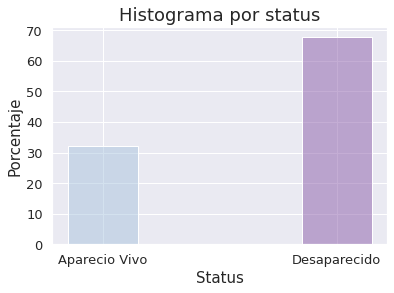

In [ ]:
# Verificamos la distribución
sns.set(style = "darkgrid")
sns.histplot(datos, x = "status", stat = "percent", hue = "status",
             palette = "BuPu", shrink = 0.3, legend = False)
plt.xlabel("Status", size = 15)
plt.ylabel("Porcentaje", size = 15)
plt.title("Histograma por status", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
#plt.savefig('hist_status.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 <a list of 7 Text major ticklabel objects>)

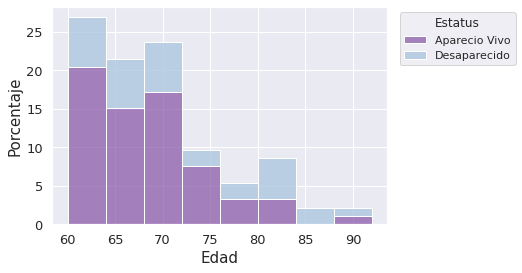

In [ ]:
# Histograma de edad por status
sns.histplot(data = datos, x = 'edad', stat = 'percent', hue = 'status',
                palette = "BuPu", multiple = "stack")
plt.xlabel("Edad", size = 15)
plt.ylabel("Porcentaje", size = 15)
#plt.title("Histograma de edad por status", size = 18)
plt.legend(title = "Estatus", bbox_to_anchor = (1.4, 1),
           labels = datos.status.unique())
plt.xticks(size = 13)
plt.yticks(size = 13)
#plt.savefig('hist_edad.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 8 Text major ticklabel objects>)

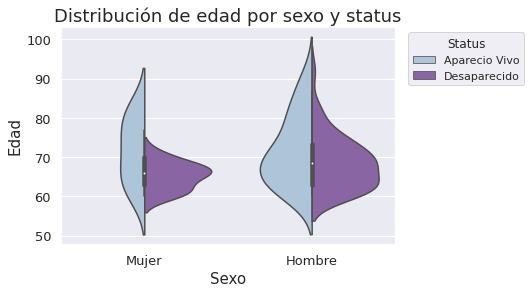

In [ ]:
# Gráfico de violines de la distribución por edad de los aparecidos divi-
# didos por sexo
sns.set(style = "darkgrid")
sns.violinplot(x = "sexo", y = "edad", hue = "status",
                    data = datos, palette = "BuPu", split = True,
               saturation = 0.8, inner = "box",
               order = ("Mujer", "Hombre"))
plt.xlabel("Sexo", size = 15)
plt.ylabel("Edad", size = 15)
plt.legend(title = "Status", bbox_to_anchor = (1.4, 1))
plt.title("Distribución de edad por sexo y status", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
#plt.savefig('edad_sexo_status.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

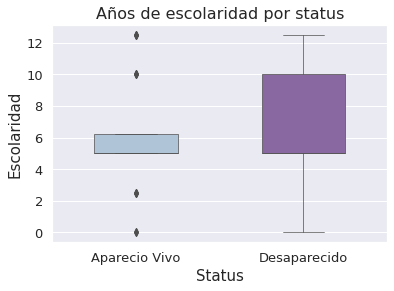

In [ ]:
# Gráfico de la distribución por escolaridad
sns.set(style = "darkgrid")
sns.boxplot(data = datos, x = "status", y = "escolaridad", palette = "BuPu",
            linewidth = 0.7, width = 0.5)
plt.xlabel("Status", size = 15)
plt.ylabel("Escolaridad", size = 15)
plt.title("Años de escolaridad por status", size = 16)
plt.yticks(size = 13)
plt.xticks(size = 13)
#plt.savefig('status_educación.png', dpi = 300, figsize = (8, 11),
#            bbox_inches = 'tight')

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

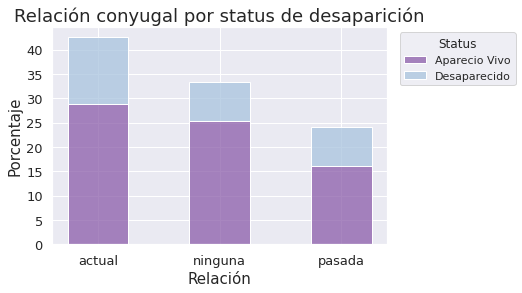

In [ ]:
# Status desaparición por estado civil
sns.set(style = "darkgrid")
sns.histplot(datos, x = "relacion", hue = "status", multiple = "stack",
                 stat = "percent", palette = "BuPu", shrink = 0.5)
plt.xlabel("Relación", size = 15)
plt.ylabel("Porcentaje", size = 15)
plt.legend(title = "Status", bbox_to_anchor = (1.4, 1),
           labels = datos.status.unique())
plt.title("Relación conyugal por status de desaparición", size = 18)
plt.yticks(size = 13)
plt.xticks(size = 13)
#plt.savefig('sexo_estado_civil.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

([0, 1], <a list of 2 Text major ticklabel objects>)

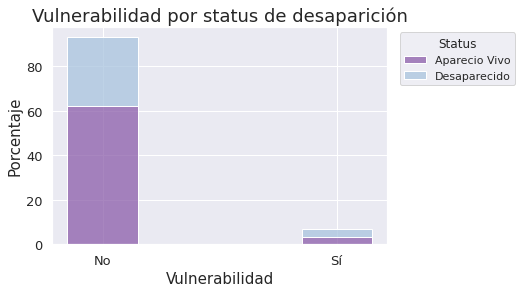

In [ ]:
# Status desaparición por vulnerabilidad
sns.set(style = "darkgrid")
sns.histplot(datos, x = "vulnerabilidad", hue = "status", multiple = "stack",
                 stat = "percent", palette = "BuPu", shrink = 0.3)
plt.xlabel("Vulnerabilidad", size = 15)
plt.ylabel("Porcentaje", size = 15)
plt.legend(title = "Status", bbox_to_anchor = (1.4, 1),
           labels = datos.status.unique())
plt.title("Vulnerabilidad por status de desaparición", size = 18)
plt.yticks(size = 13)
plt.xticks(size = 13)
#plt.savefig('vulnerabilidad.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text major ticklabel objects>)

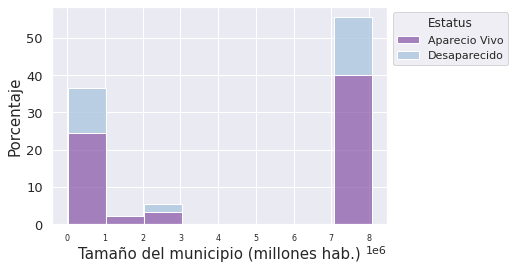

In [ ]:
# Tamaño del municipio
sns.set(style = "darkgrid")
sns.histplot(data = datos, x = 'municipio', stat = 'percent', hue = 'status',
                palette = "BuPu", multiple = "stack")
plt.xlabel("Tamaño del municipio (millones hab.)", size = 15)
plt.ylabel("Porcentaje", size = 15)
plt.legend(title = "Estatus",
           labels = datos.status.unique(), bbox_to_anchor = (1, 1))
#plt.title("Histograma de municipio y status de desaparición", size = 18)
plt.xticks(size = 8)
plt.yticks(size = 13)
#plt.savefig('hist_municipio.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 8 Text major ticklabel objects>)

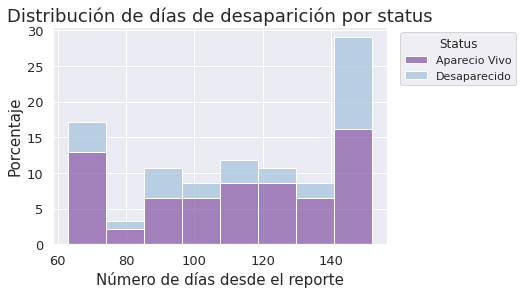

In [ ]:
# Finalmente, miramos la distribución por año
sns.set(style = "darkgrid")
sns.histplot(data = datos, x = 'dias', stat = 'percent', hue = 'status',
                palette = "BuPu", multiple = "stack")
plt.xlabel("Número de días desde el reporte", size = 15)
plt.ylabel("Porcentaje", size = 15)
plt.title("Distribución de días de desaparición por status", size = 18)
plt.legend(title = "Status", bbox_to_anchor = (1.4, 1),
           labels = datos.status.unique())
plt.xticks(size = 13)
plt.yticks(size = 13)
#plt.savefig('hist_años.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

### Predicción datos no vistos

In [ ]:
# Cargar el modelo desde Google Drive
filename = '/content/gdrive/My Drive/Proyecto/finalized_lgbm_model.sav'
with open(filename, 'rb') as file:  
    pickled_lgbm_model = pickle.load(file)
pickled_lgbm_model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


LGBMClassifier(random_state=2021, silent='warn')